# Entanglement Entropy estimation for Pure States

#### NOTE: 

Qiskist uses little-endian format while the the theoretical parts use big-endian format

In [1]:
# %pip install qiskit
# %pip install matplotlib.pyplot
# %pip install numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return -p*np.log2(p) -(1-p)*np.log2(1-p)


def von_neumann_S_from_k(k):
    if k>0.25:
        return 1
    
    t = np.sqrt(1-4*k)
    l1 = 0.5*(1+t)
    return entropy(l1)


def estimate_entropy(statistics):
    # if '0011' in statistics and '1100' in statistics:
    #     k = statistics['0011'] + statistics['1100']
    # elif '0011' in statistics:
    #     k = statistics['0011']*2
    # elif '1100' in statistics:
    #     k = statistics['1100']*2
    # else:
    #     k = 0
    k = 0
    if '1100' in statistics: k+= statistics['1100']
    if '1001' in statistics: k+= statistics['1001']
    
    return von_neumann_S_from_k(k)

In [5]:
unitary_trial = np.eye(16)

### Custom Unitary Gate


We will construct a gate that takes the states:

$$U|0011\rangle \rightarrow \frac{1}{\sqrt{2}}(|0011\rangle + |0110\rangle), \space \space U|0110\rangle \rightarrow \frac{1}{\sqrt{2}}(-|0011\rangle + |0110\rangle)$$
$$U|1100\rangle \rightarrow \frac{1}{\sqrt{2}}(|1100\rangle - |1001\rangle), \space \space U|1001\rangle \rightarrow \frac{1}{\sqrt{2}}(|1100\rangle + |1001\rangle)$$

and acts like an *Identity* on the rest the basis states.

The *Unitary* for the desired operation is depicted below:


$$ U = \begin{pmatrix} 
1&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\ 
0&1&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\ 
0&0&1&0&0&0&0&0&0&0&0&0&0&0&0&0\\ 
0&0&0&\dfrac{1}{\sqrt{2}}&0&0&-\dfrac{1}{\sqrt{2}}&0&0&0&0&0&0&0&0&0\\ 
0&0&0&0&1&0&0&0&0&0&0&0&0&0&0&0\\ 
0&0&0&0&0&1&0&0&0&0&0&0&0&0&0&0\\ 
0&0&0&\dfrac{1}{\sqrt{2}}&0&0&\dfrac{1}{\sqrt{2}}&0&0&0&0&0&0&0&0&0\\ 
0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0\\ 
0&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0\\ 
0&0&0&0&0&0&0&0&0&\dfrac{1}{\sqrt{2}}&0&0&-\dfrac{1}{\sqrt{2}}&0&0&0\\ 
0&0&0&0&0&0&0&0&0&0&1&0&0&0&0&0\\ 
0&0&0&0&0&0&0&0&0&0&0&1&0&0&0&0\\ 
0&0&0&0&0&0&0&0&0&\dfrac{1}{\sqrt{2}}&0&0&\dfrac{1}{\sqrt{2}}&0&0&0\\ 
0&0&0&0&0&0&0&0&0&0&0&0&0&1&0&0\\ 
0&0&0&0&0&0&0&0&0&0&0&0&0&0&1&0\\ 
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&1\\ 
\end{pmatrix} $$

In [6]:
k2 = 1/np.sqrt(2)

unitary_trial[12, 12], unitary_trial[12, 6], unitary_trial[6, 12], unitary_trial[6, 6] = k2, k2, -k2, k2
unitary_trial[3, 3], unitary_trial[3, 9], unitary_trial[9, 3], unitary_trial[9, 9] = k2, -k2, k2, k2

In [7]:
# m, n = unitary_trial.shape
# hmap = {}
# hmap[1.0] = '1'
# hmap[0.0] = '0'
# hmap[np.float64(0.7071067811865475)] = '\dfrac{1}{\sqrt{2}}'
# hmap[-np.float64(0.7071067811865475)] = '-\dfrac{1}{\sqrt{2}}'


# for row in range(m):
#     for col in range(n):
#         if col != n-1:
#             print(hmap[unitary_trial[row, col]], end='&')
#         else:
#             print(hmap[unitary_trial[row, col]], end="\\\\ \n")

Qiskit Implementation: *big-endian* $\rightarrow$ *little-endian*

$$ U = \begin{pmatrix}
1&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\ 
0&1&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\ 
0&0&1&0&0&0&0&0&0&0&0&0&0&0&0&0\\ 
0&0&0&\dfrac{1}{\sqrt{2}}&0&0&0&0&0&-\dfrac{1}{\sqrt{2}}&0&0&0&0&0&0\\ 
0&0&0&0&1&0&0&0&0&0&0&0&0&0&0&0\\ 
0&0&0&0&0&1&0&0&0&0&0&0&0&0&0&0\\ 
0&0&0&0&0&0&\dfrac{1}{\sqrt{2}}&0&0&0&0&0&-\dfrac{1}{\sqrt{2}}&0&0&0\\ 
0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0\\ 
0&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0\\ 
0&0&0&\dfrac{1}{\sqrt{2}}&0&0&0&0&0&\dfrac{1}{\sqrt{2}}&0&0&0&0&0&0\\ 
0&0&0&0&0&0&0&0&0&0&1&0&0&0&0&0\\ 
0&0&0&0&0&0&0&0&0&0&0&1&0&0&0&0\\ 
0&0&0&0&0&0&\dfrac{1}{\sqrt{2}}&0&0&0&0&0&\dfrac{1}{\sqrt{2}}&0&0&0\\ 
0&0&0&0&0&0&0&0&0&0&0&0&0&1&0&0\\ 
0&0&0&0&0&0&0&0&0&0&0&0&0&0&1&0\\ 
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&1\\ 
\end{pmatrix}$$

In [8]:
import qiskit.quantum_info as qi

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

In [9]:
custom_unitary_op = qi.Operator(unitary_trial)

In [10]:
# theta = 2*np.arccos(np.sqrt(2/3))

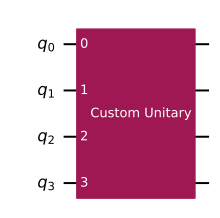

In [11]:
qc = QuantumCircuit(4)
# qc.x(0)
# qc.x(1)
sv = qi.Statevector(qc)
qc.unitary(custom_unitary_op, [0,1,2,3], label='Custom Unitary')
# qc.measure_all()
qc.draw('mpl')

In [12]:
sv.draw('latex')

<IPython.core.display.Latex object>

In [13]:
# results = Sampler().run(qc).result()
# statistics = results.quasi_dists[0].binary_probabilities()
# display(plot_histogram(statistics))

In [14]:
v = qi.Statevector(1/np.sqrt(3)*np.array([1, 1, 1, 0]))
# v = qi.Statevector(1/2*np.ones(4))
print("Quantum State : ")
v.draw('latex')

Quantum State : 


<IPython.core.display.Latex object>

In [15]:
tensor_state = v^v
print("Tensor Product State : ")
tensor_state.draw('latex')

Tensor Product State : 


<IPython.core.display.Latex object>

In [16]:
tensor_state = tensor_state.evolve(qc)
tensor_state.draw('latex')

<IPython.core.display.Latex object>

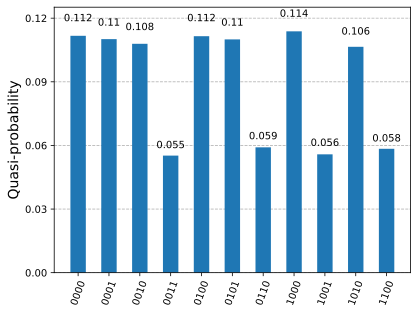

In [17]:
tensor_state.seed(26)

n = 10000
statistics = tensor_state.sample_counts(n)
keys = sorted(statistics.keys())
probs = {i:statistics[i]/n for i in keys}
plot_histogram(probs)

In [18]:
print(f"Estimated Entropy : {estimate_entropy(probs)}")

K = np.sum(tensor_state.probabilities()[[3, 12]])
true_entropy = von_neumann_S_from_k(K)
print(f"True Entropy      : {true_entropy}")

Estimated Entropy : 0.5615089978019777
True Entropy      : 0.5500477595827576


In [19]:
s = []
n = np.array(range(1, 100001, 100))

for j in n:
    if (j-1)%10000==0:
        print(f'{j-1}-th trial completed')

    tensor_state.seed(36)
    statistics = tensor_state.sample_counts(j)
    # keys = sorted(statistics.keys())
    probs = {i[::-1]:statistics[i]/j for i in statistics}
    estimated_entropy = estimate_entropy(probs)
    s += [estimated_entropy]

0-th trial completed
10000-th trial completed
20000-th trial completed
30000-th trial completed
40000-th trial completed
50000-th trial completed
60000-th trial completed
70000-th trial completed
80000-th trial completed
90000-th trial completed


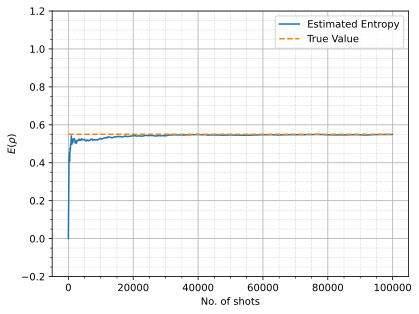

In [20]:
plt.plot(n, s, label='Estimated Entropy')
plt.plot(n, np.ones(len(n))*true_entropy, ls='dashed', label='True Value')
plt.xlabel("No. of shots")
plt.ylabel("$E(\\rho)$")
plt.legend()
plt.ylim(-0.2,1.2)
plt.grid()
plt.grid(which='minor', ls=':', lw=0.5)
plt.minorticks_on()
plt.show()

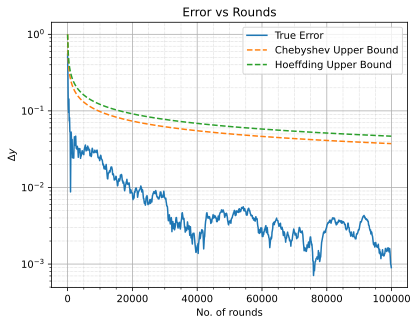

In [27]:
error_prob = 0.01
err = abs(np.array(s) - true_entropy)
cheb_est_err = [von_neumann_S_from_k(i) for i in (1/(8*np.sqrt(n*error_prob)))]
hoff_est_err = [von_neumann_S_from_k(i) for i in np.sqrt(np.log(2/error_prob)/(2*n))]


plt.semilogy(n, err, label='True Error')
plt.semilogy(n, cheb_est_err, ls='dashed', label='Chebyshev Upper Bound')
plt.semilogy(n, hoff_est_err, ls='dashed', label='Hoeffding Upper Bound')
plt.grid()
plt.grid(which='minor', ls=':', lw=0.5)
plt.minorticks_on()
plt.xlabel("No. of rounds")
plt.ylabel("$\Delta y$")
plt.legend()
plt.title("Error vs Rounds")
plt.show()

## Circuit Scheme (LOCC)

In this scheme **Alice** and **Bob** share the qubits of the on which they can perform local unitary operations and share their measurements through classical communication. This is the seperated lab setup.

### Theory :

Analysing the required states $|0011\rangle, |0110\rangle, |1100\rangle$ and $|1001\rangle$ where state is given by: $|q_{A1}\ q_{B1}\ q_{A2}\ q_{B2}\rangle$, 
> $q_{A1}$ and $q_{A2}$ refers to Alice's pair of qubits <br>
> $q_{B1}$ and $q_{B2}$ refers to Bob's pair of qubits

We can see that $|q_{A1} \oplus q_{A2}\rangle = |1\rangle$ for both the states, where $\oplus$ is the *XOR* operator.<br><br>
Thus Alice can measure her pair of qubits and send the measured values ($q_{A1_{m}}, \ q_{A2_{m}}$) to Bob via classical communication.<br>
Once Bob receives the pair of qubits, he could then perform a 2-qubit unitary operation on his pair of qubits if $$q_{A1_{m}} \oplus q_{A2_{m}} = 1$$

We can devise a 2-qubit gate that acts on qubits $q_{B1}, \ q_{B2}$ that replicates the same operation that was performed by the 4-qubit gate as shown above.

$$U|01\rangle \rightarrow \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$
$$U|10\rangle \rightarrow \frac{1}{\sqrt{2}}(-|01\rangle + |10\rangle)$$

The circuit for this unitary operation is given below

In [95]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

import qiskit.quantum_info as qi

In [96]:
custom_unitary = np.array([[1,0,0,0],[0,1/np.sqrt(2),1/np.sqrt(2),0],[0,1/np.sqrt(2),-1/np.sqrt(2),0],[0,0,0,1]])
custom_op = qi.Operator(custom_unitary)

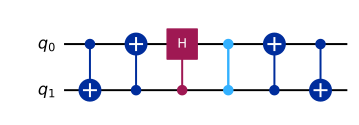

In [97]:
qc_gate = QuantumCircuit(2)
qc_gate.cx(0, 1)
qc_gate.cx(1, 0)
qc_gate.ch(1, 0)
qc_gate.cz(1, 0)
qc_gate.cx(1, 0)
qc_gate.cx(0, 1)
# qc_gate.draw('mpl', reverse_bits=True)
qc_gate.draw('mpl')

In [98]:
qc_gate = qc_gate.to_gate()

In [99]:
def build_locc_circuit(initial_state, qc_gate=qc_gate):
    tensor_state = initial_state^initial_state
    
    cbits = ClassicalRegister(4, 'Measure')
    # cbits_out = ClassicalRegister(1, 'Meas')
    qbits_a = QuantumRegister(1, 'Alice_1')
    qbits_b = QuantumRegister(1, 'Bob_1')
    qbits_a1 = QuantumRegister(1, 'Alice_2')
    qbits_b1 = QuantumRegister(1, 'Bob_2')
    qbit_anc = QuantumRegister(1, 'Out')
    qc = QuantumCircuit(qbits_a, qbits_b, qbits_a1, qbits_b1, cbits)
    qc.initialize(tensor_state, [0, 1, 2, 3])
    # qc.h(0)
    # qc.cx(0, 1)
    # qc.h(2)
    # qc.cx(2,3)
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(2, 1)
    qc.barrier()
    qc.cx(0, 2)
    # qc.measure(0, 2)
    # qc.measure(2, 3)
    qc_controlled_gate = qc_gate.control(1)
    qc.append(qc_controlled_gate, [2, 1, 3])
    qc.cx(0, 2)
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)
    qc.measure(3, 3)
    # qc.cx(0, 2)
    # qc.x(1)
    # qc.ccx(1,2,3)
    # qc.cx(3, 4)
    # qc.ccx(1,2,3)
    # qc.x(1)
    # qc.cx(0, 2)
    # qc.measure(4, 4)
    
    return qc
    

In [100]:
# cbits = ClassicalRegister(4, 'Measure')
# # cbits_out = ClassicalRegister(1, 'Measure')
# qbits_a = QuantumRegister(1, 'Alice_1')
# qbits_b = QuantumRegister(1, 'Bob_1')
# qbits_a1 = QuantumRegister(1, 'Alice_2')
# qbits_b1 = QuantumRegister(1, 'Bob_2')
# qc = QuantumCircuit(qbits_a, qbits_b, qbits_a1, qbits_b1, cbits)
# # qc.h(0)
# # qc.cx(0, 1)
# # qc.h(2)
# # qc.cx(2,3)
# qc.barrier()
# qc.measure(0, 0)
# qc.measure(2, 1)
# qc.barrier()
# qc.cx(0, 2)
# # qc.measure(0, 2)
# # qc.measure(2, 3)
# qc_controlled_gate = qc_gate.control(1)
# qc.append(qc_controlled_gate, [2, 1, 3])
# qc.cx(0, 2)
# qc.barrier()
# qc.measure(0, 0)
# qc.measure(1, 1)
# qc.measure(2, 2)
# qc.measure(3, 3)
# qc.draw('mpl')

In [101]:
initial_state = qi.Statevector(1/np.sqrt(3)*np.array([1, 1, 1j, 0]))
tensor_state = initial_state^initial_state

In [102]:
qc1 = build_locc_circuit(initial_state)

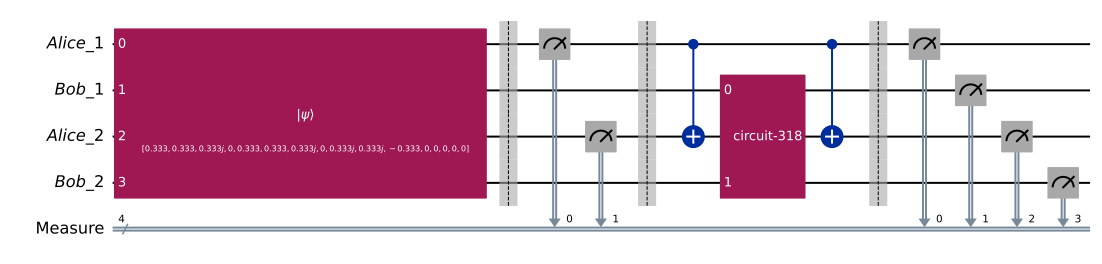

In [103]:
qc1.draw('mpl')

In [104]:
n = 10000

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, seed_transpiler=20)
isa_qc = pm.run(qc1)
# with Session(backend=aer_sim) as session:
#     sampler = Sampler()
#     result = sampler.run([isa_qc], shots=n).result()


job = aer_sim.run([isa_qc], shots=n, seed_simulator=20, memory=True)

In [105]:
result = job.result()

In [106]:
bits = result.get_memory()

In [107]:
bits

['0101',
 '0000',
 '1001',
 '0010',
 '1100',
 '0101',
 '1000',
 '0101',
 '0100',
 '1000',
 '0100',
 '1000',
 '0101',
 '0000',
 '1001',
 '0110',
 '0101',
 '0011',
 '0010',
 '1010',
 '1100',
 '0101',
 '0001',
 '1000',
 '0010',
 '0101',
 '0001',
 '0011',
 '0100',
 '1010',
 '1000',
 '0011',
 '0100',
 '0100',
 '0001',
 '0010',
 '0000',
 '0001',
 '1010',
 '0100',
 '1010',
 '0010',
 '1000',
 '0110',
 '0110',
 '0001',
 '0100',
 '0101',
 '0010',
 '1010',
 '0110',
 '1010',
 '0000',
 '0011',
 '0100',
 '1001',
 '1100',
 '0010',
 '1001',
 '0010',
 '1100',
 '0001',
 '1000',
 '0100',
 '0010',
 '0001',
 '1001',
 '0011',
 '0010',
 '0101',
 '0101',
 '1010',
 '1000',
 '0000',
 '1100',
 '0001',
 '1010',
 '0101',
 '1000',
 '0100',
 '0001',
 '0010',
 '0100',
 '0010',
 '0001',
 '1000',
 '0100',
 '0000',
 '1001',
 '0100',
 '1000',
 '0110',
 '0110',
 '0000',
 '1010',
 '0101',
 '1000',
 '0100',
 '1010',
 '0001',
 '0000',
 '0010',
 '0001',
 '0010',
 '0001',
 '0100',
 '1000',
 '0000',
 '0010',
 '0010',
 '1000',
 

In [108]:
statistics = result.get_counts()

In [109]:
statistics

{'0101': 1064,
 '1000': 1109,
 '0000': 1135,
 '1001': 569,
 '0010': 1126,
 '1100': 570,
 '0100': 1079,
 '0110': 528,
 '0011': 524,
 '1010': 1149,
 '0001': 1147}

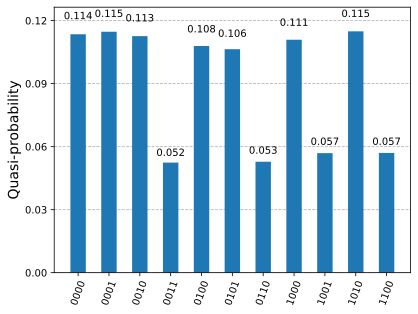

In [110]:
probs = {i:statistics[i]/n for i in statistics}
plot_histogram(probs)

In [111]:
probs

{'0101': 0.1064,
 '1000': 0.1109,
 '0000': 0.1135,
 '1001': 0.0569,
 '0010': 0.1126,
 '1100': 0.057,
 '0100': 0.1079,
 '0110': 0.0528,
 '0011': 0.0524,
 '1010': 0.1149,
 '0001': 0.1147}

In [112]:
estimated_entropy = estimate_entropy(probs)
print(f'Estimated Entropy : {estimated_entropy}')

Estimated Entropy : 0.5603999396785426


## Distinguishing between a weekly entangled and a product state

**K** = $(ad-bc)$ <br>
For a product state, the parameter **K** is 0 and thus the error for estimating the Entropy of Entanglement is 0 as well

But now let us consider a weekly entangled state:
$$\sqrt{0.98}|00\rangle + \sqrt{0.02}|11\rangle $$

To distinguish between a product state and a weekly entangled state, we just need a single measurement outcome of either $|0011\rangle$ or $|1100\rangle$ which confirms that **K** is non-zero.

Thus we need on an average $\dfrac{1}{|K|^2}$ measurements to distinguish them apart.

For the above case it turns out to be: 
$|K|^2 = 0.0196 $, and thus we need ~ 52 measurements on average to distinguish them. This also matches the intuition since less entangled a state is, less is its entanglement entropy and thus more measurements are required to tell them apart from a product state.

### Relation b\w $|K|^2$ and $S(\rho)$

In [75]:
k = np.linspace(0, 0.25, endpoint=True)
entropy_k = np.array([von_neumann_S_from_k(i) for i in k])

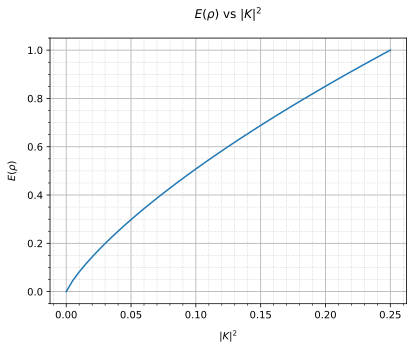

In [88]:
plt.plot(k, entropy_k)
plt.grid()
plt.grid(which='minor', ls=':', lw=0.5)
plt.minorticks_on()
plt.xlabel("$|K|^2$", labelpad=10)
plt.ylabel("$E(\\rho)$", labelpad=10)
plt.title("$E(\\rho)$ vs $|K|^2$", pad=20)
plt.show()

# Best-Arm Identification Setup

## Problem Statement:

Given a set of *n* copies of **Pure States**, find the **Pure State** corresponding to the highest ***Distillable Entanglement*** with the lowest no. of measurements.

Since $E(\rho)$ and $|K|^2$ are positively correlated, it is sufficient to find the state corresponding to the highest value of $|K|^2$.

In [130]:
initial_state1 = qi.Statevector(np.array([np.sqrt(0.55), 0, 0, np.sqrt(0.45)]))
initial_state2 = qi.Statevector(1/np.sqrt(2)*np.array([1, 0, 0, 1]))
initial_state3 = qi.Statevector(np.array([0, np.sqrt(0.6), np.sqrt(0.4), 0]))

qc1 = build_locc_circuit(initial_state1)
qc2 = build_locc_circuit(initial_state2)
qc3 = build_locc_circuit(initial_state3)

In [131]:
circuits = [qc1, qc2, qc3]
qcs = []
jobs = []

n = 1000000 # No. of rounds

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, seed_transpiler=10)

for idx, circuit in enumerate(circuits):
    job = aer_sim.run([pm.run(circuit)], shots=n, seed_simulator=40, memory=True)
    jobs.append(job)
        

In [132]:
bit_results = []
stat_results = []

for idx, job in enumerate(jobs):
    bit_results.append(job.result().get_memory())
    stat_results.append(job.result().get_counts())

In [133]:
stat_results

[{'0011': 123805,
  '1100': 123876,
  '0110': 123676,
  '1111': 202480,
  '0000': 302743,
  '1001': 123420},
 {'0011': 125166,
  '1100': 125448,
  '0110': 124596,
  '1111': 250212,
  '0000': 249923,
  '1001': 124655},
 {'0011': 120344,
  '1100': 120570,
  '0101': 359847,
  '1001': 120063,
  '1010': 159629,
  '0110': 119547}]

In [134]:
class Bandits_setup:
    def __init__(self, n_arms, n_rounds, bit_results, initial_states, agent):
        self.initial_states = initial_states
        self.n_arms = n_arms
        self.n_rounds = n_rounds
        self.bit_results = np.array(bit_results)
        self.indices = np.zeros(self.n_arms).astype(int)
        self.k = self.find_k()
        print(self.k)
        self.sequences = []
        self.agent = agent


    def find_k(self):
        res = []

        for idx, state in enumerate(self.initial_states):
            a, b, c, d = state
            res.append(abs(a*d-b*c)**2)

        return res


    def play(self, arm):
        self.sequences.append(arm)
        ans = self.bit_results[arm][self.indices[arm]]
        self.indices[arm] += 1

        return ans


    def environment(self):
        self.regret = []
        self.history = np.zeros(self.n_arms)
        c_regret = 0
        best_arm = np.argmax(self.k)
        best_arm_val = self.k[best_arm]
        prev_out = None
        
        for idx in range(self.n_rounds):
            arm = agent.get(prev_out)
            prev_out = self.play(arm)
            c_regret += best_arm_val - self.k[arm]
            self.regret.append(c_regret)
            self.history[arm] += 1

        return self.regret, self.history
            

        

In [135]:
class Agent:
    def __init__(self, n_arms, n_rounds):
        self.n_arms = n_arms
        self.n_rounds = n_rounds

    def get(self, output):
        return np.random.randint(0, self.n_arms)

In [136]:
class UCB(Agent):
    def __init__(self, n_arms, n_rounds):
        super().__init__(n_arms, n_rounds)
        self.round = 0
        self.occur = np.zeros(self.n_arms)
        self.mean_estimate = np.zeros(self.n_arms)
        self.prev_arm = None
        self.list = ['1001', '1100']
    
    def get(self, prev_output):
        if self.prev_arm == None:
            pass
        else:
            if prev_output in self.list:
                out = 1
            else:
                out = 0
                
            p = self.occur[self.prev_arm]
            est = self.mean_estimate[self.prev_arm]
            self.occur[self.prev_arm] += 1
            self.mean_estimate[self.prev_arm] = (p*est + out)/(1+p)

        if self.round < self.n_arms*(self.n_rounds//100):
            arm = self.round % self.n_arms
        else:
            u_t = self.mean_estimate + 1/(16*np.sqrt(self.occur**2))
            # print(u_t)
            # arm = np.argmax(u_t)
            np.random.choice(np.where(u_t == u_t.max())[0]) # Arbitrary tie-breaking
            
        self.prev_arm = arm
        self.round += 1
        return arm

In [137]:
class ThompsonSampling(Agent):
    def __init__(self, n_arms, n_rounds):
        super().__init__(n_arms, n_rounds)
        self.round = 0
        self.a = np.ones(n_arms)
        self.b = np.ones(n_arms)
        self.prev_arm = None
        self.list = ['1001', '0011']


    def get(self, prev_output):
        if self.prev_arm == None:
            pass
        else:
            if prev_output in self.list:
                out = 1
            else:
                out = 0    
            self.a[self.prev_arm] += out 
            self.b[self.prev_arm] += 1-out
            
        if self.round < self.n_arms:
            arm = self.round % self.n_arms
        else:
            u_t = np.random.beta(self.a, self.b)
            # print(u_t)
            # arm = np.argmax(u_t)
            arm = np.random.choice(np.where(u_t == u_t.max())[0]) # Arbitrary tie-breaking
        
            
        self.prev_arm = arm
        self.round += 1
        return arm

    

In [138]:
initial_states = [initial_state1, initial_state2, initial_state3]
n_arms = len(initial_states)
n_rounds = 1000000

agent = ThompsonSampling(n_arms, n_rounds)
bandits = Bandits_setup(n_arms, n_rounds, bit_results, initial_states, agent)

regret, history = bandits.environment()
print(np.round(regret, 2))

[np.float64(0.2475), np.float64(0.2499999999999999), np.float64(0.24000000000000005)]
[0.0000e+00 0.0000e+00 1.0000e-02 ... 7.5887e+02 7.5887e+02 7.5887e+02]


In [139]:
history

array([188981., 782377.,  28642.])

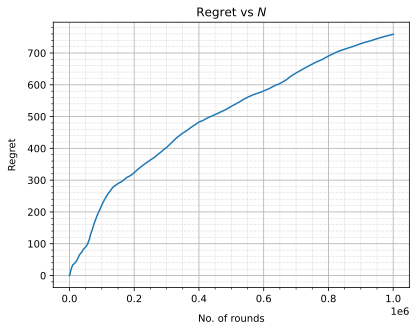

In [140]:
plt.plot(range(n), regret)
plt.xlabel("No. of rounds", labelpad=10)
plt.ylabel("Regret", labelpad=10)
plt.grid()
plt.grid(which='minor', ls=':', lw=0.5)
plt.minorticks_on()
plt.title("Regret vs $N$")
plt.show()

### Rough

#### Decomposing the Unitary Matrix 

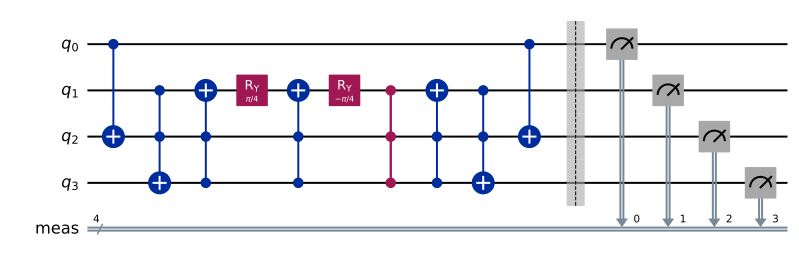

In [77]:
qc = QuantumCircuit(4)

# Initialization
# qc.x(0)
# qc.x(1)
# qc.x(2)
# qc.x(3)

qc.cx(0, 2)
qc.ccx(1, 2, 3)
qc.ccx(3, 2, 1)
qc.ry(np.pi/4, 1)   #
qc.ccx(3, 2, 1)     # (For cch gate)   
qc.ry(-np.pi/4, 1)  #
qc.ccz(3, 2, 1)
qc.ccx(3, 2, 1)
qc.ccx(1, 2, 3)
qc.cx(0, 2)
qc.measure_all()

qc.draw('mpl')

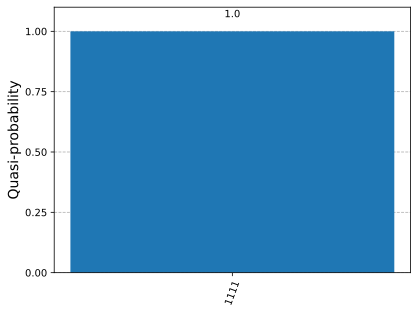

In [76]:
results = Sampler().run(qc).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))